In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


In [16]:
Co60=pd.read_csv("./data/Co60_10minNaI.csv")
Na22=pd.read_csv("./data/Co60_10minNaI.csv")
Cs137=pd.read_csv("./data/Co60_10minNaI.csv")

In [17]:
x=Co60.canal
y=Co60.cuentas

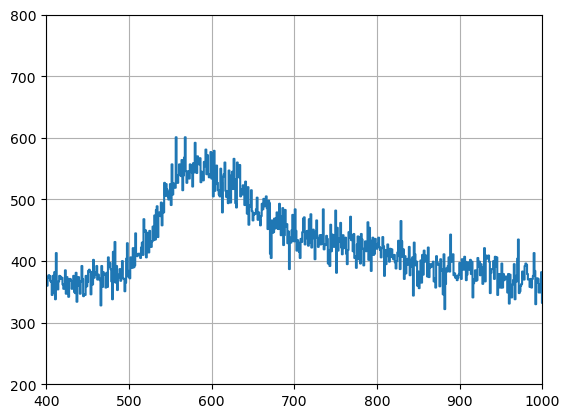

In [18]:
plt.plot(x,y,ds="steps-mid")
plt.xlim(400,1000)
plt.ylim(200,800)
plt.grid()
plt.show()


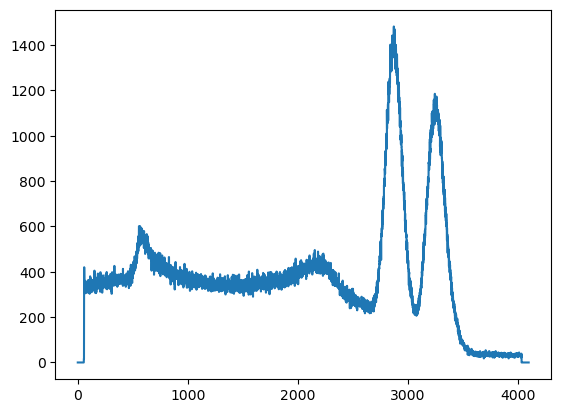

In [19]:
plt.plot(x,y,ds="steps-mid")

In [20]:
def gaussiana(x,M,mu,sigma):
    return M*np.exp(-0.5*((mu-x)/(sigma))**2)
def fondo(x,b0,b1,mu):
    return b0+b1*(mu-x)

def gaussiana_experimental(x,M,mu,sigma,b0,b1):
    return fondo(x,b0,b1,mu)+gaussiana(x,M,mu,sigma)

In [30]:
fit1=curve_fit(gaussiana_experimental,x[400:750],y[400:750],p0=[200,555,37,350,0.25])
args=fit1[0]
args

array([ 1.54928407e+02,  5.88852619e+02,  4.76610925e+01,  4.01708262e+02,
       -2.57377402e-01])

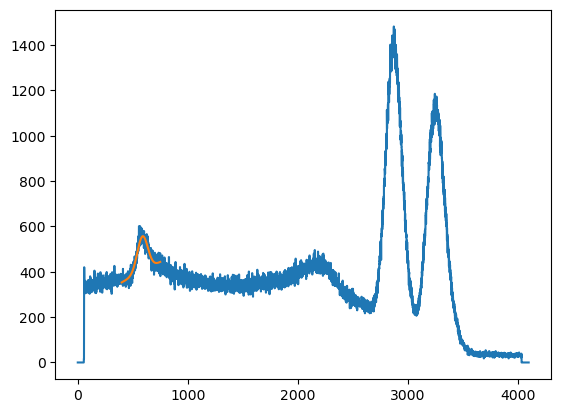

In [33]:

x1=np.linspace(400,750,1000)
y1=gaussiana_experimental(x1,*args)

plt.plot(x,y,ds="steps-mid")
plt.plot(x1,y1)
